8


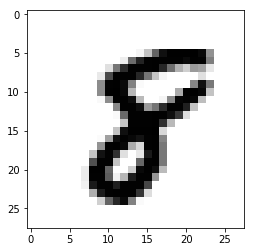

In [2]:
# Adapted from : https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1


#import required libraries

import struct as st #This module performs conversions between Python values and C structs represented as Python bytes objects.
import numpy as np 
import matplotlib.pyplot as plt

# Open the IDX file in readable binary mode.
filename = {'images' : 'train-images.idx3-ubyte' ,'labels' : 'train-labels.idx1-ubyte'}
train_imagesfile = open(filename['images'],'rb')
train_labelsfile = open(filename['labels'],'rb')


# Set pointer to the beginning of the file.
train_imagesfile.seek(0)
train_labelsfile.seek(0)

# Read the magic number
magic_img = st.unpack('>4B',train_imagesfile.read(4))
magic_lab = st.unpack('>4B',train_labelsfile.read(4))


# Read the dimensions of the Image data-set
images = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
n_row_i = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
n_col_i = st.unpack('>I',train_imagesfile.read(4))[0] #num of column

# Read the dimensions of the Label data-set
labels = st.unpack('>I',train_labelsfile.read(4))[0] #num of items

# Reading the Image data
nBytesTotal = images*n_row_i*n_col_i*1 

# 'B' is used since it is of 'unsigned char' C type and ‘integer’ Python type
# and has standard size 1 as mentioned in the official documentation of struct.
# ‘>’ is used since the data is in MSB first (high endian) format used by most 
# non-Intel processors, as mentioned in their original website.
images_array = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((images,n_row_i,n_col_i))

# Reading the label data
labels_array = np.asarray(st.unpack('>'+'B'*labels,train_labelsfile.read(labels))).reshape((labels))


print(labels_array[777])


plt.imshow(images_array[777],cmap='gray')